In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr

In [13]:
survey_2020=pd.read_csv('D:\DataSets\IT Salary Survey EU  2020.csv')


In [14]:
survey_2020.columns


Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [15]:
## Renaming Columns 
survey_2020.columns = ["Year", "Age", "Gender","City","Position","Years of experience","Germany Experience","Seniority level","Tech program language",
                       "Other Language","Yearly salary","Yearly bonus and stocks", "Salary one year ago","Bonus and stocks last year","Vacation days",
                       "Employment_status","Сontract_duration","Language","Company size","Company type","Job loss COVID","Kurzarbeit","Monetary Support"]

survey_2020.columns = survey_2020.columns.str.replace(' ', '_')

In [16]:
## Deleting unneeded columns 
del survey_2020['Germany_Experience']
del survey_2020['Other_Language']
del survey_2020['Employment_status']
del survey_2020['Сontract_duration']

In [17]:
survey_2020.shape

(1253, 19)

In [18]:
survey_2020.isna().sum()

Year                            0
Age                            27
Gender                         10
City                            0
Position                        6
Years_of_experience            16
Seniority_level                12
Tech_program_language         127
Yearly_salary                   0
Yearly_bonus_and_stocks       424
Salary_one_year_ago           368
Bonus_and_stocks_last_year    639
Vacation_days                  68
Language                       16
Company_size                   18
Company_type                   25
Job_loss_COVID                 20
Kurzarbeit                    880
Monetary_Support              791
dtype: int64

In [19]:
## Droping missing and duplicate values 
survey_2020=survey_2020.dropna(subset=['Age','Gender','Position','Years_of_experience','Seniority_level','Salary_one_year_ago','Language']) 
survey_2020=survey_2020.drop_duplicates()

In [20]:
survey_2020.isna().sum()

Year                            0
Age                             0
Gender                          0
City                            0
Position                        0
Years_of_experience             0
Seniority_level                 0
Tech_program_language          70
Yearly_salary                   0
Yearly_bonus_and_stocks       235
Salary_one_year_ago             0
Bonus_and_stocks_last_year    276
Vacation_days                  12
Language                        0
Company_size                    0
Company_type                    2
Job_loss_COVID                  2
Kurzarbeit                    575
Monetary_Support              511
dtype: int64

In [21]:
## Changing datetime to date 
survey_2020['Year'] = pd.to_datetime(survey_2020['Year']).dt.year

In [22]:
## Filtering only data from 2020
survey_2020_filtered=survey_2020[survey_2020['Year']==2020]

In [23]:
## Cleaning city column
survey_2020_filtered=survey_2020_filtered.replace({'City': {'ü': 'u', 'ö': 'o','ń':'n'}}, regex=True)
survey_2020_filtered['City'] = survey_2020_filtered['City'].str.title().str.strip()

survey_2020_filtered=survey_2020_filtered.replace({'City': {'Nurnberg': 'Nuremberg','Kiev': 'Kyiv','Koln':'Cologne','Den Haag':'The Haag',
                                                            'Cracovia':'Krakow','Bolingen':'Bollingen','Braunschweig':'Brunswick',
                                                            'Sevilla':'Seville','Saint-Petersburg':'Saint Petersburg','Dusseldurf':'Dusseldorf'}})

In [ ]:
## Cleaning position column 
survey_2020_filtered['Position'] = survey_2020_filtered['Position'].str.title().str.strip()

counts_2020=survey_2020_filtered.Position.value_counts()
cutoff1=3
cutoff1_keep= list(counts_2020[counts_2020.values>=cutoff1].index)
survey_2020_filtered['Position'] = survey_2020_filtered['Position'].where(survey_2020_filtered['Position'].isin(cutoff1_keep), 'Other')

In [24]:
survey_2020_filtered.dtypes

Year                            int64
Age                           float64
Gender                         object
City                           object
Position                       object
Years_of_experience            object
Seniority_level                object
Tech_program_language          object
Yearly_salary                 float64
Yearly_bonus_and_stocks        object
Salary_one_year_ago           float64
Bonus_and_stocks_last_year     object
Vacation_days                  object
Language                       object
Company_size                   object
Company_type                   object
Job_loss_COVID                 object
Kurzarbeit                    float64
Monetary_Support               object
dtype: object

In [27]:
## Cleaning Years of Experience 
survey_2020_filtered['Years_of_experience']=survey_2020_filtered['Years_of_experience'].astype(str)

survey_2020_filtered['Years_of_experience']=survey_2020_filtered['Years_of_experience'].str.replace(r',', '.',regex=True)
survey_2020_filtered['Years_of_experience']=survey_2020_filtered['Years_of_experience'].str.replace(r'6 \(not as a data scientist. but as a lab scientist\)',
                                                                                                    '6',regex=True)
survey_2020_filtered['Years_of_experience']=survey_2020_filtered['Years_of_experience'].str.replace(r'15\. thereof 8 as CTO','15',regex=True)
survey_2020_filtered['Years_of_experience']=survey_2020_filtered['Years_of_experience'].str.replace(r'1 \(as QA Engineer\) / 11 in total','11',regex=True)
survey_2020_filtered['Years_of_experience']=survey_2020_filtered['Years_of_experience'].str.replace(r'less than year','1',regex=True)         

survey_2020_filtered['Years_of_experience'] = pd.to_numeric(survey_2020_filtered['Years_of_experience'])

In [30]:
## Take out ridiculously high salaries 
survey_2020_filtered = survey_2020_filtered.drop(survey_2020_filtered[survey_2020_filtered.Yearly_salary > 500000].index)

In [31]:
# Cleaning Seniority Level
survey_2020_filtered['Seniority_level'] = survey_2020_filtered['Seniority_level'].str.title().str.strip()
survey_2020_filtered=survey_2020_filtered.replace({'Seniority_level': {'Lead': 'Senior','Head': 'Senior','Principal':'Senior','Student':'Junior',
                                                                       'Intern':'Junior','Working Student':'Junior','C-Level':'Senior',
                                                                       'No Idea, There Are No Ranges In The Firm':'Na','Director':'Senior',
                                                                       'C-Level Executive Manager':'Senior','Key': 'Na','No Level':'Na','Cto':'Senior',
                                                                       'Work Center Manager':'Senior','Manager':'Senior','Vp':'Senior',
                                                                       'Entry Level':'Junior'}})

In [32]:
## Cleaning Tech language
survey_2020_filtered['Tech_program_language'] = survey_2020_filtered['Tech_program_language'].str.title().str.strip()

In [34]:
## Take out ridiculously high salaries last year
survey_2020_filtered = survey_2020_filtered.drop(survey_2020_filtered[survey_2020_filtered.Salary_one_year_ago > 500000].index)

In [35]:
## Cleaning Vacation Days 
survey_2020_filtered['Vacation_days'] = survey_2020_filtered['Vacation_days'].str.title().str.strip()
survey_2020_filtered=survey_2020_filtered.replace({'Vacation_days': {'23+': '23','24 Labour Days': '24','~25':'25',
                                                                     '30 In Contract (But Theoretically Unlimited)':'365',
                                                                     'Unlimited':'365','(No Idea)':'Na'}})

In [36]:
## Cleaning Language column
survey_2020_filtered['Language'] = survey_2020_filtered['Language'].str.replace('Deutsch', 'German')
survey_2020_filtered=survey_2020_filtered.replace({'Language': {'English and German': 'Multiple', 'Русский': 'Russian','50/50':'Multiple',
                                                                'Deuglisch':'German','both':'Multiple','Russian, English':'Multiple'}})

In [37]:
## Cleaning COVID column 
survey_2020_filtered=survey_2020_filtered.replace({'Job_loss_COVID': {'i didn\'t but will be looking for new one because of covid': 'No',
                                                                      'kurzarbeitzeit for 1.5 months': 'No',
                                                                      'Lost the job but for different reason':'No',
                                                                      'yes but found a new one with better pay / perks':'Yes',
                                                                      'No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months':'No',
                                                                      'Leads and project inquiries have slowed down':'No',
                                                                      'Have been a freelancer at the beginning of year':'Yes',
                                                                       'Laid off for a bit':'Laid Off'}})

In [38]:
## Cleaning monetary support 
survey_2020_filtered['Monetary_Support'] = survey_2020_filtered['Monetary_Support'].str.title().str.strip()

Monetary_2020=survey_2020_filtered.Monetary_Support.value_counts()
cutoff2=3
cutoff2_keep= list(Monetary_2020[Monetary_2020.values>=cutoff2].index)
survey_2020_filtered['Monetary_Support'] = survey_2020_filtered['Monetary_Support'].where(survey_2020_filtered['Monetary_Support'].isin(cutoff2_keep), 'Other')

In [39]:
survey_2020_filtered.shape

(830, 19)

In [40]:
survey_2020_filtered.describe().round()

,Year,Age,Years_of_experience,Yearly_salary,Salary_one_year_ago,Kurzarbeit
count,830.0,830.0,830.0,830.0,830.0,274.0
mean,2020.0,33.0,9.0,72557.0,66156.0,13.0
std,0.0,5.0,5.0,22423.0,20850.0,16.0
min,2020.0,22.0,0.0,12000.0,11000.0,0.0
25%,2020.0,29.0,5.0,60000.0,55000.0,0.0
50%,2020.0,32.0,9.0,70000.0,65000.0,0.0
75%,2020.0,36.0,12.0,80000.0,75000.0,30.0
max,2020.0,66.0,40.0,250000.0,230000.0,40.0


2020 Salaries Survey

Distribution of Ages

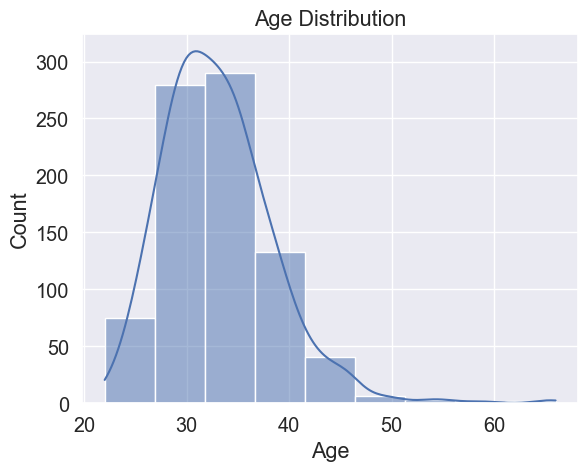

Age Descriptive Statistics


count    830.0
mean      33.0
std        5.0
min       22.0
25%       29.0
50%       32.0
75%       36.0
max       66.0
Name: Age, dtype: float64

In [41]:
sns.set(font_scale=1.3)
plot=sns.histplot(survey_2020_filtered.Age,bins=9,kde=True)
plt.title('Age Distribution')
plt.show()

print('Age Descriptive Statistics')
survey_2020_filtered['Age'].describe().round()

Years of Experince for Seniority Level

In [42]:
level_agg = survey_2020_filtered.groupby('Seniority_level').agg(Median_ye=('Years_of_experience', 'median'),
                                                                IQR=('Years_of_experience', iqr)).reset_index()
level_agg.drop([2], axis=0, inplace=True)

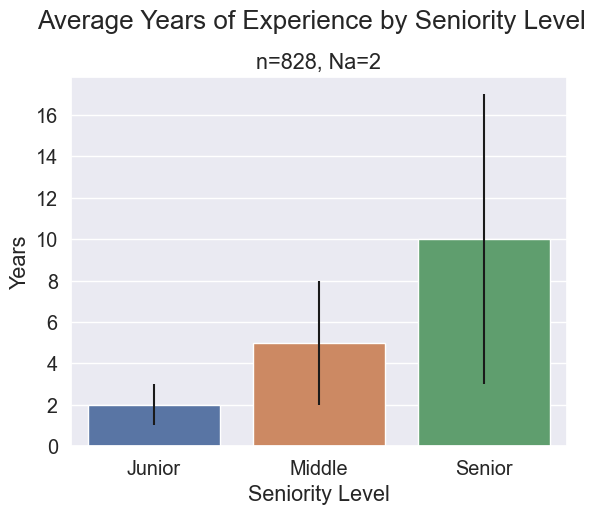

,Seniority_level,Median_ye,IQR
0,Junior,2.0,1.0
1,Middle,5.0,3.0
3,Senior,10.0,7.0


In [43]:
iqr=level_agg["IQR"]
sns.barplot(data=level_agg, x="Seniority_level", y="Median_ye", yerr=iqr)
plt.suptitle("Average Years of Experience by Seniority Level",y=1.02)
plt.title('n=828, Na=2')
plt.ylabel('Years')
plt.xlabel('Seniority Level')
plt.show()

level_agg

Salary Comparsion 2019-2020

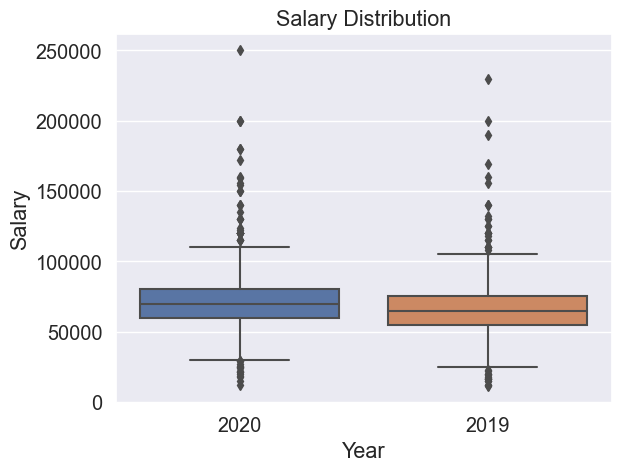

,Yearly_salary,Salary_one_year_ago
count,830.0,830.0
mean,72557.0,66156.0
std,22423.0,20850.0
min,12000.0,11000.0
25%,60000.0,55000.0
50%,70000.0,65000.0
75%,80000.0,75000.0
max,250000.0,230000.0


In [44]:
g=sns.boxplot(data=survey_2020_filtered.loc[:,['Yearly_salary','Salary_one_year_ago']])
g.set_xticklabels(['2020', '2019'])
plt.title('Salary Distribution')
plt.ylabel('Salary')
plt.xlabel('Year')
plt.show()

survey_2020_filtered[['Yearly_salary','Salary_one_year_ago']].describe().round()

Bonus and Stocks Distribution

In [45]:
stocks=survey_2020_filtered[survey_2020_filtered['Yearly_bonus_and_stocks'].notnull()]
stocks=stocks[stocks['Bonus_and_stocks_last_year'].notnull()]

stocks = stocks.drop(stocks[stocks.Yearly_bonus_and_stocks == 'bvg only'].index)
stocks = stocks.drop(stocks[stocks.Bonus_and_stocks_last_year == 'learning budget, bvg, gym, food'].index)
stocks = stocks.astype({'Yearly_bonus_and_stocks':'float','Bonus_and_stocks_last_year':'float'})
stock_drop = stocks.drop(stocks[stocks.Yearly_bonus_and_stocks > 400000].index)


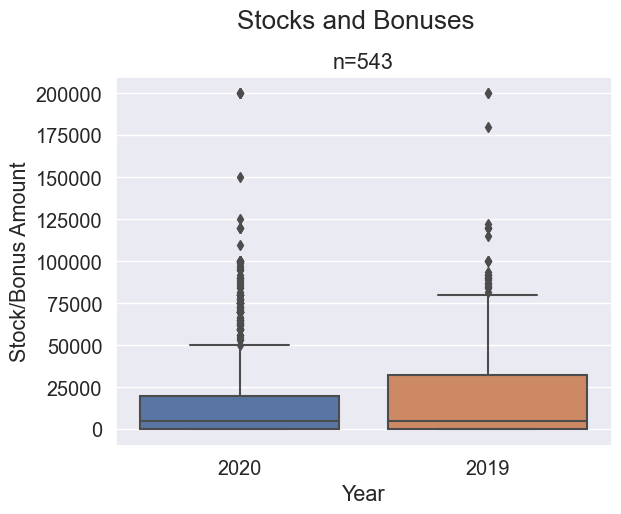

,Yearly_bonus_and_stocks,Bonus_and_stocks_last_year
count,543.0,543.0
mean,19890.0,20582.0
std,32831.0,31589.0
min,0.0,0.0
25%,0.0,0.0
50%,5000.0,5000.0
75%,20000.0,32250.0
max,200000.0,200000.0


In [46]:
g=sns.boxplot(data=stock_drop.loc[:,['Yearly_bonus_and_stocks','Bonus_and_stocks_last_year']])
g.set_xticklabels(['2020', '2019'])
plt.suptitle("Stocks and Bonuses",y=1.02)
plt.title('n=543')
plt.ylabel('Stock/Bonus Amount')
plt.xlabel('Year')
plt.show()

#stocks[['Yearly_bonus_and_stocks','Bonus_and_stocks_last_year']].describe().round()
stock_drop[['Yearly_bonus_and_stocks','Bonus_and_stocks_last_year']].describe().round()

Salary versus Years of Experience¶

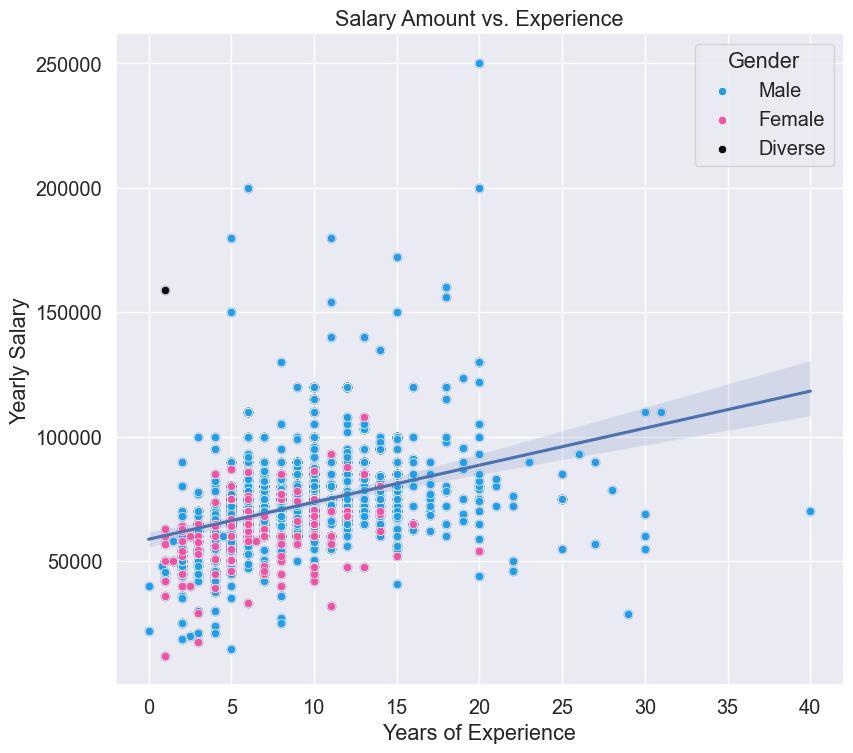

In [47]:
g = sns.FacetGrid(survey_2020_filtered,hue='Gender',palette=["#1C9FEF", "#FA50A3", "#0C0B0B"])
sns.regplot(x='Years_of_experience', y="Yearly_salary", data=survey_2020_filtered)
g=g.map(sns.scatterplot,'Years_of_experience',"Yearly_salary")
g.set(xticks=[0,5, 10,15,20,25,30,35,40], yticks=[50000, 100000, 150000,200000,250000])
g.fig.set_figwidth(15)
g.fig.set_figheight(10)

g.axes[0,0].set_ylabel('Yearly Salary')
g.axes[0,0].set_xlabel('Years of Experience')
plt.title('Salary Amount vs. Experience')
plt.legend (title='Gender')
plt.show()

Common City of Participants

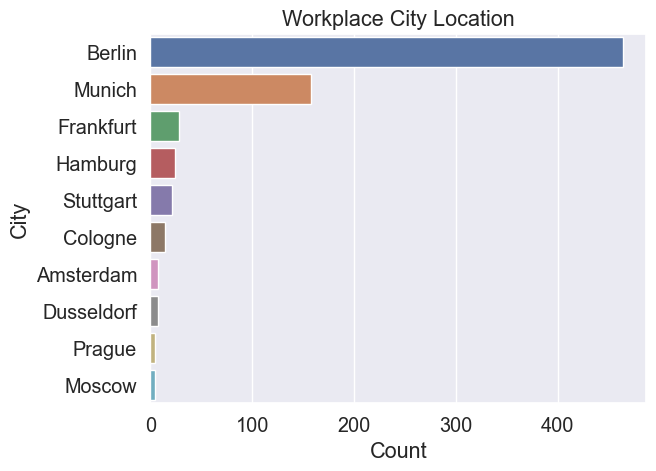

In [48]:
city10=survey_2020_filtered.City.value_counts().iloc[:10].to_frame().reset_index()
city10=city10.rename(columns={"index": "City", "City": "Count"})

sns.barplot(x=city10["Count"],y=city10["City"])
plt.title('Workplace City Location')
plt.show()

Language used by Participants

In [49]:
language=survey_2020_filtered.Language.value_counts()
print('Percentage of Participants Spoken Language')
x=(language/language.sum())*100
round(x,2)

Percentage of Participants Spoken Language


English     80.96
German      16.63
Russian      1.08
Multiple     0.36
Italian      0.36
Czech        0.24
Spanish      0.24
Polish       0.12
Name: Language, dtype: float64


Position Breakdown

In [50]:
position=survey_2020_filtered.Position.value_counts().reset_index().iloc[:11]
position=position.rename(columns={"index": "Position", "Position": "Count"})
position.drop([2], axis=0, inplace=True)

top10=[]
for x in position['Position']:
     if x not in top10:
        top10.append(x)
        
rslt_df = survey_2020_filtered[survey_2020_filtered['Position'].isin(top10)] 

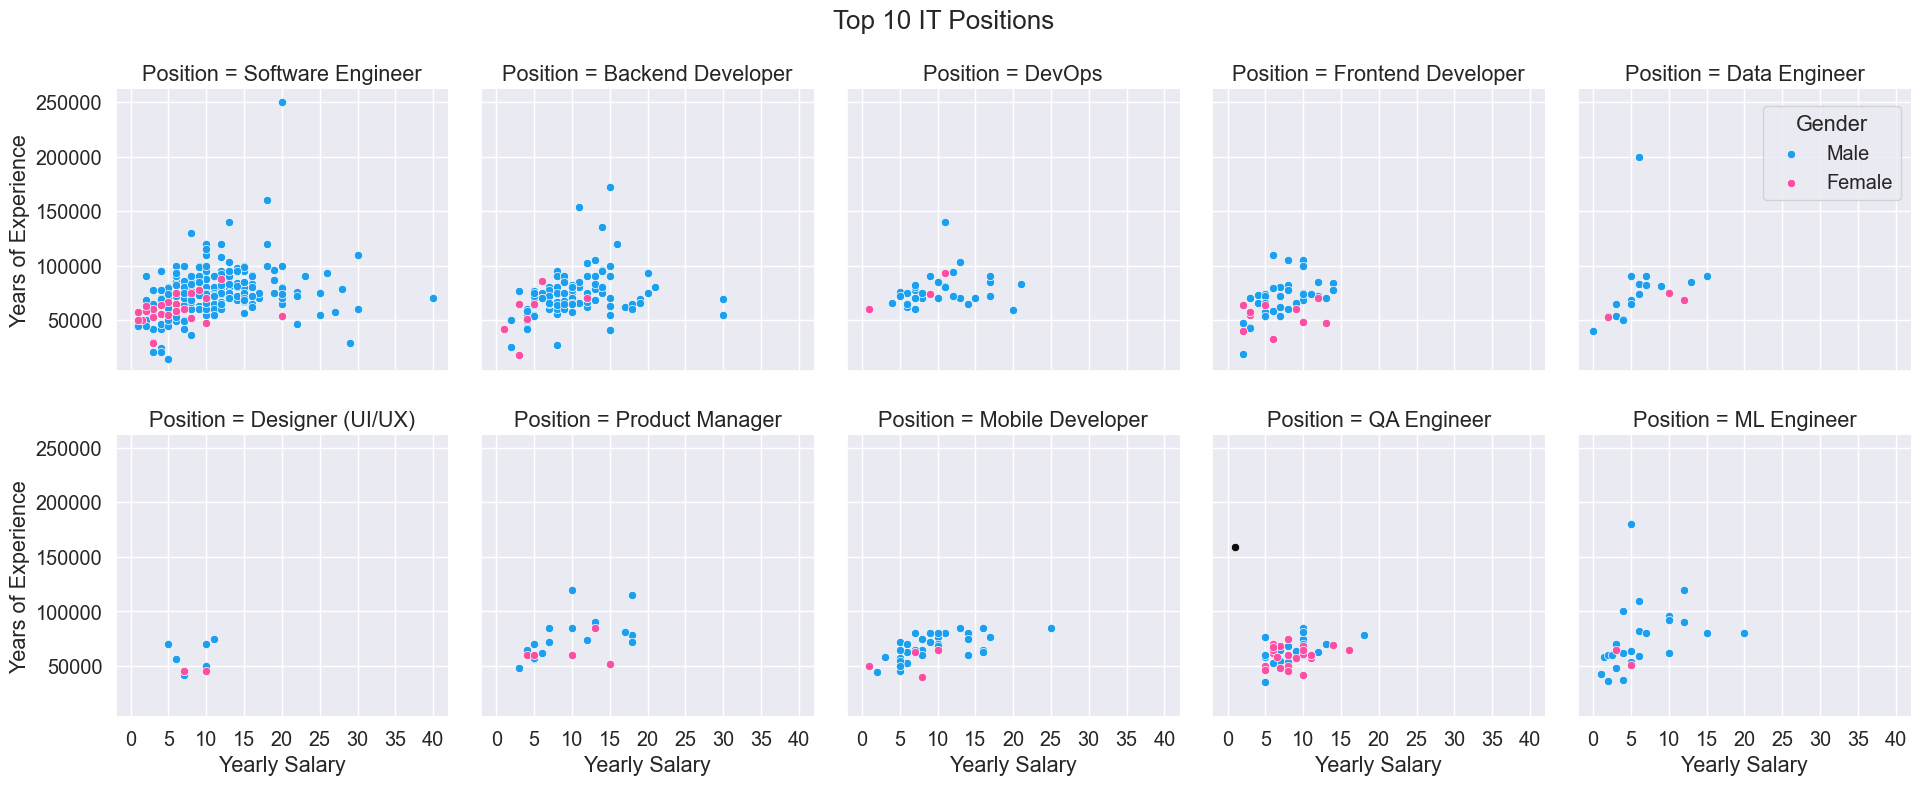

In [51]:
g = sns.FacetGrid(rslt_df, col='Position', hue='Gender',palette=["#1C9FEF", "#FA50A3", "#0C0B0B"],col_wrap=5,)
g=g.map(sns.scatterplot,'Years_of_experience',"Yearly_salary")
g.set(xticks=[0,5, 10,15,20,25,30,35,40], yticks=[50000, 100000, 150000,200000,250000],xlabel='Yearly Salary', ylabel='Years of Experience')
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
plt.suptitle('Top 10 IT Positions',y=1.02)
plt.legend (loc='upper right',title='Gender',bbox_to_anchor=(1,2.2))

plt.show()

Most Used Program Languages

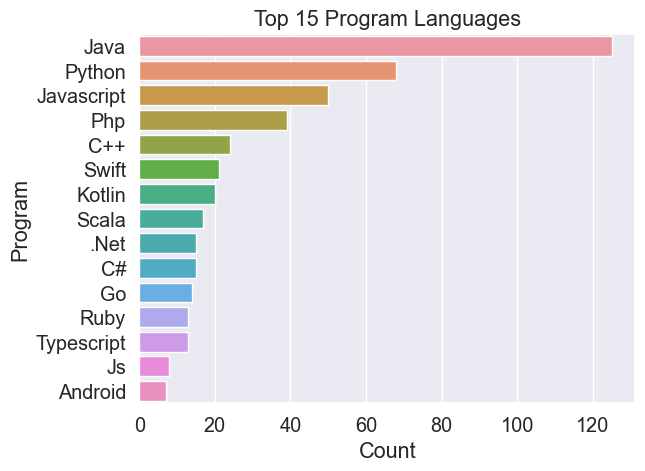

In [52]:
program=rslt_df["Tech_program_language"].value_counts().iloc[:15].reset_index()
program=program.rename(columns={"index": "Program", "Tech_program_language": "Count"})
sns.barplot(data=program, y="Program", x="Count")
plt.title('Top 15 Program Languages')
plt.show()

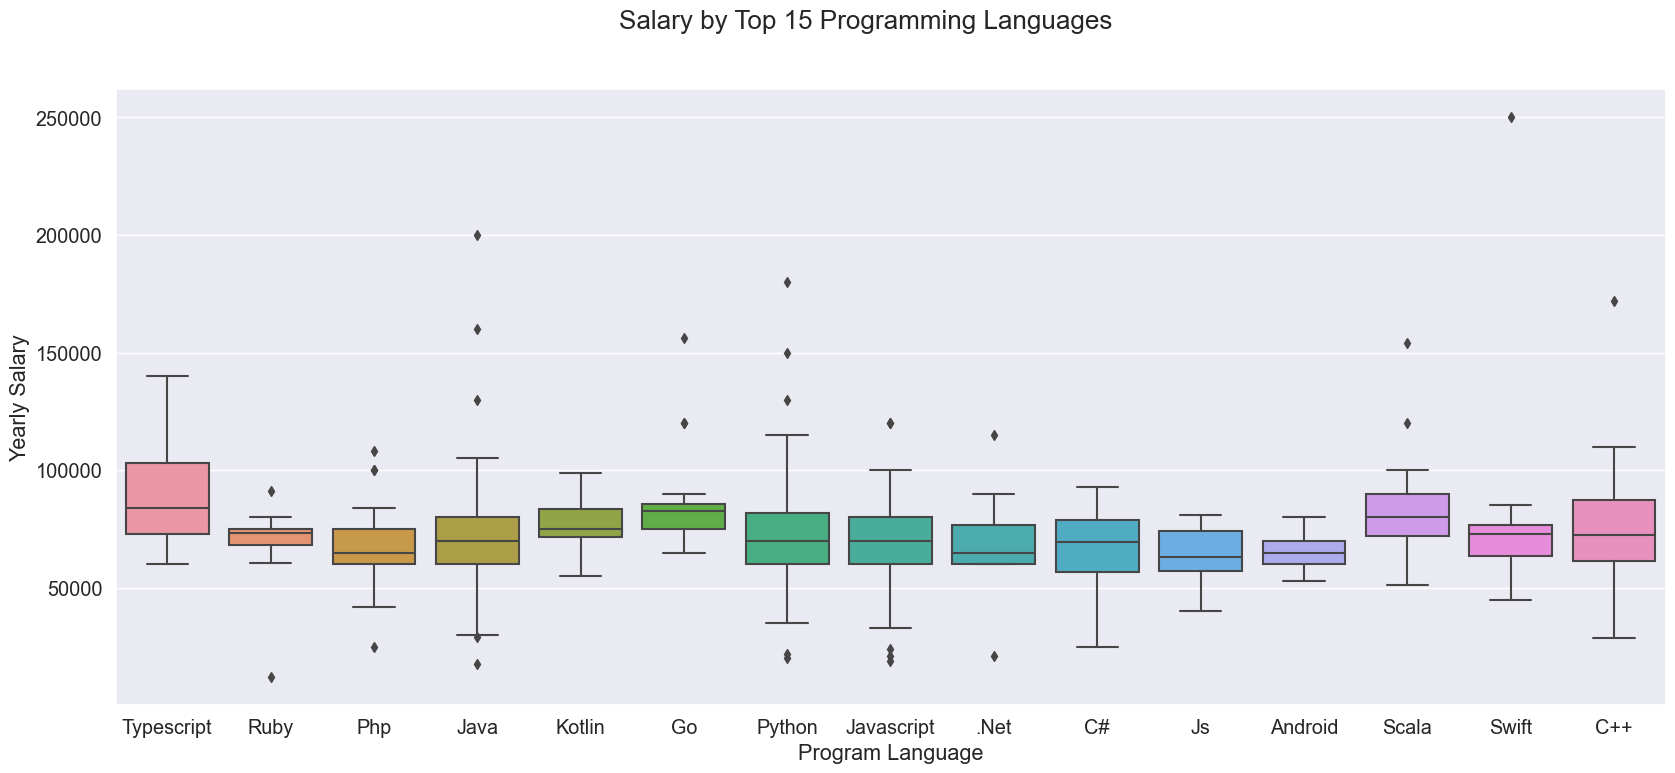

In [53]:
pr_top=[]
for x in program['Program']:
     if x not in pr_top:
        pr_top.append(x)
        
pr_df = survey_2020_filtered[survey_2020_filtered['Tech_program_language'].isin(pr_top)] 
sns.boxplot(data=pr_df, x="Tech_program_language", y="Yearly_salary")
plt.xlabel('Program Language')
plt.ylabel('Yearly Salary')
plt.gcf().set_size_inches(20, 8)
plt.suptitle('Salary by Top 15 Programming Languages')
plt.show()


Job Loss

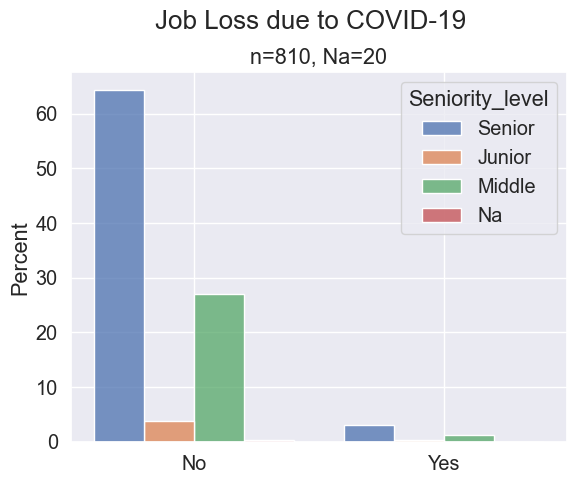

In [54]:
sns.histplot(survey_2020_filtered, x="Job_loss_COVID", stat="percent", multiple="dodge", shrink=.8, hue='Seniority_level')
plt.suptitle('Job Loss due to COVID-19',y=1.01)
plt.title('n=810, Na=20')
plt.xlabel('')
plt.show()

# SUMMARY

1. Most of the employees are of the age 30 - 40 and most of the employees are aged 36 .Total employees are 830
2. Senior employees have worked for 10 years while middle seniority level have worked for 5 years 
3. Maximum year salary increased from 230,000 in 2019 to 250000 in 2020.In general most employees received a salary raise in 2020
4. Male and female employees with 10 years experience are paid between 50,000 - 100,000 a year
5. More than 400 employees live in Berlin city and Moscow has the least number of employees 
6. A good percentage of employees use English language regardless of the city or country you live in .English is the most common language used for communication among the empployees 
7. Java ,Python and javascript are most used programming language among the employees 
8. During covid pandemic senior employees did not lose their jobs only a very few employees were laid off 
